In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


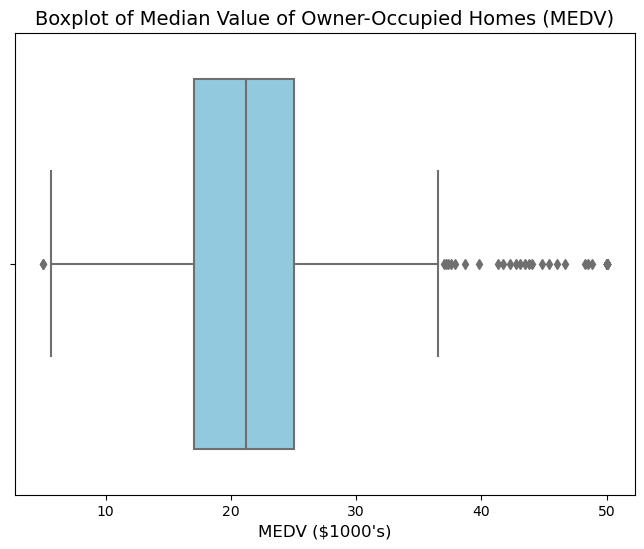

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'], color="skyblue")
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)', fontsize=14)
plt.xlabel('MEDV ($1000\'s)', fontsize=12)
plt.show()

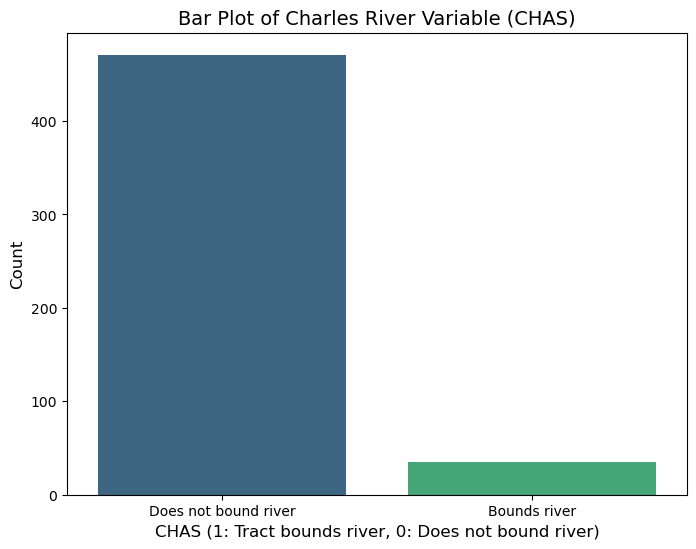

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'], palette="viridis")
plt.title('Bar Plot of Charles River Variable (CHAS)', fontsize=14)
plt.xlabel('CHAS (1: Tract bounds river, 0: Does not bound river)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Does not bound river', 'Bounds river'])
plt.show()

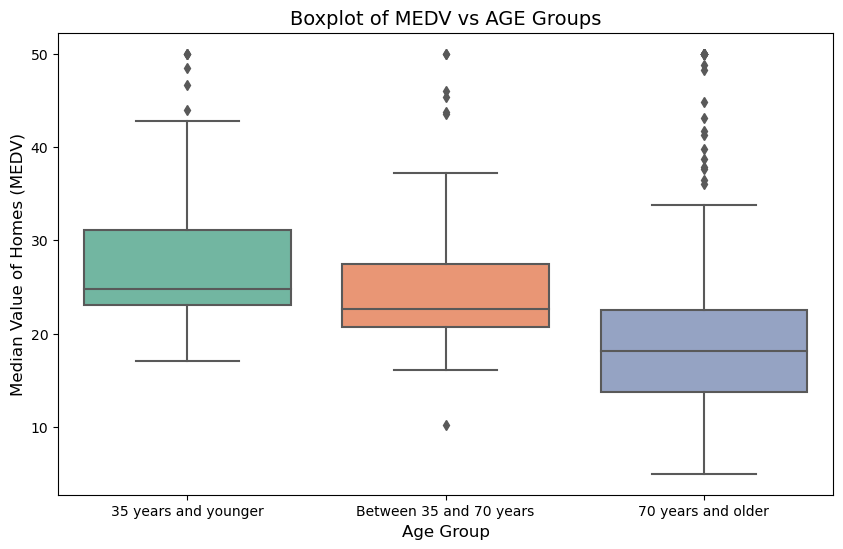

In [8]:
bins = [0, 35, 70, 100]  # Define bin edges
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True)

# Create a boxplot for MEDV vs AGE_Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df, palette="Set2")
plt.title('Boxplot of MEDV vs AGE Groups', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Value of Homes (MEDV)', fontsize=12)
plt.show()

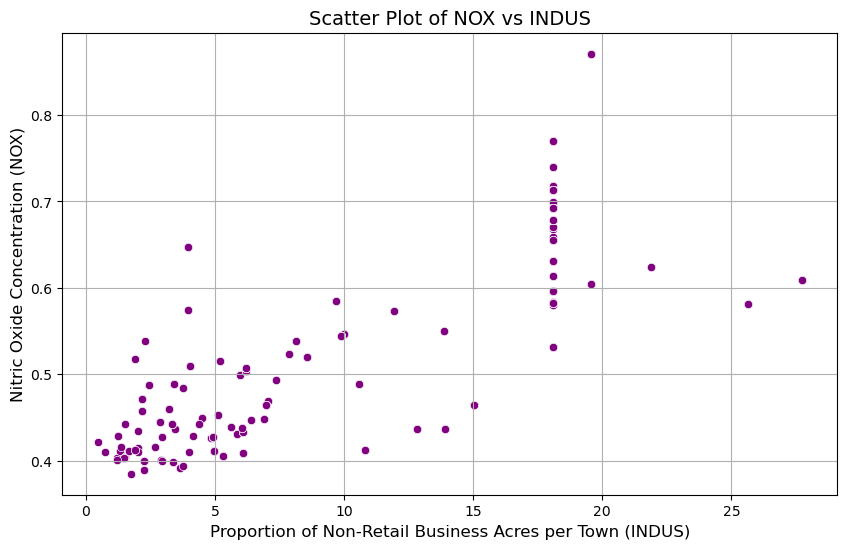

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, color='purple')
plt.title('Scatter Plot of NOX vs INDUS', fontsize=14)
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)', fontsize=12)
plt.ylabel('Nitric Oxide Concentration (NOX)', fontsize=12)
plt.grid(True)
plt.show()

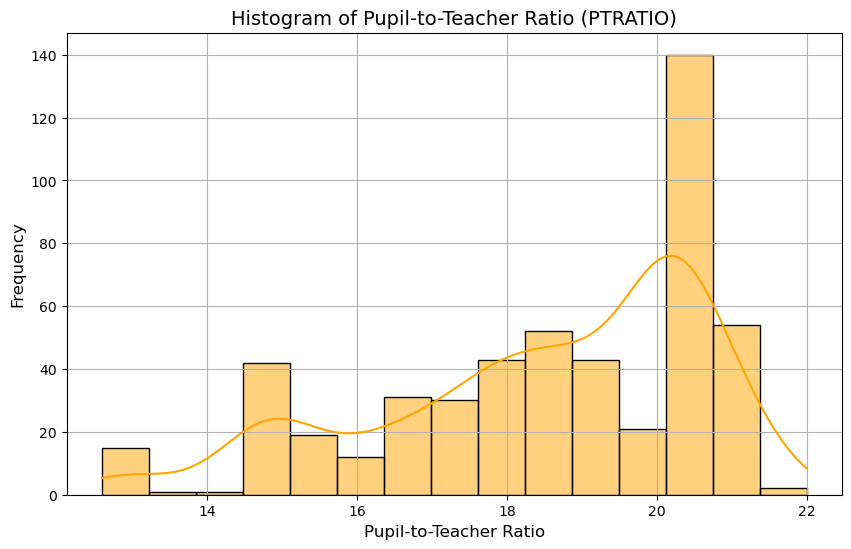

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True, color='orange')
plt.title('Histogram of Pupil-to-Teacher Ratio (PTRATIO)', fontsize=14)
plt.xlabel('Pupil-to-Teacher Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

In [12]:
from scipy.stats import ttest_ind
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']  # Houses bounded by the river
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']  # Houses not bounded by the river

# Perform a t-test for independent samples
t_stat, p_value = ttest_ind(chas_1, chas_0, equal_var=False)  # Use Welch's t-test

# Print the results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in the median value of houses bounded by the Charles River.")
else:
    print("There is no significant difference in the median value of houses bounded by the Charles River.")

T-statistic: 3.1133
P-value: 0.0036
There is a significant difference in the median value of houses bounded by the Charles River.


In [14]:
from scipy.stats import f_oneway
bins = [0, 35, 70, 100]  # Define bin edges
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True)

# Separate MEDV values by AGE_Group
group_1 = boston_df[boston_df['AGE_Group'] == '35 years and younger']['MEDV']
group_2 = boston_df[boston_df['AGE_Group'] == 'Between 35 and 70 years']['MEDV']
group_3 = boston_df[boston_df['AGE_Group'] == '70 years and older']['MEDV']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(group_1, group_2, group_3)

# Print the results
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in Median values of houses (MEDV) for different AGE groups.")
else:
    print("There is no significant difference in Median values of houses (MEDV) for different AGE groups.")

F-statistic: 36.4076
P-value: 0.0000
There is a significant difference in Median values of houses (MEDV) for different AGE groups.


In [15]:
from scipy.stats import pearsonr
corr_coeff, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results
print(f"Pearson Correlation Coefficient: {corr_coeff:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant relationship between NOX and INDUS.")
else:
    print("There is no significant relationship between NOX and INDUS.")

Pearson Correlation Coefficient: 0.7637
P-value: 0.0000
There is a significant relationship between NOX and INDUS.


In [17]:
import statsmodels.api as sm
X = boston_df['DIS']  # Independent variable
y = boston_df['MEDV']  # Dependent variable

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        17:20:08   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0